In [75]:
import os
import warnings
from tqdm import tqdm
import random
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [76]:
courses_path = "./courses/courses.csv"
mm_path = "./major_minor/students.csv"
students_path = "./courses/students.csv"

In [89]:
df = pd.read_csv(courses_path)
df

,semester,name,code,schedule_id,course_id,term,year,acad_year,department,is_ism,is_crosslist
0,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],SCH00000031,CRS00004743,Monsoon,2024,2024-2025,AST,False,True
1,Monsoon 2024,Cosmic Messengers -2 (Laboratory),[AST-3880/ AST-4880/ PHY-3880/ PHY-4880/ PHY-6...,SCH00000031,CRS00004745,Monsoon,2024,2024-2025,AST,False,True
2,Monsoon 2024,Introduction to Biology 3: Molecular Genetics ...,[BIO-2201],SCH00000031,CRS00003118,Monsoon,2024,2024-2025,BIO,False,False
3,Monsoon 2024,Laboratory Course 2: Molecular Biology and Bio...,[BIO-2212],SCH00000031,CRS00000873,Monsoon,2024,2024-2025,BIO,False,False
4,Monsoon 2024,Introduction to Biology II: Cell Biology,[BIO-2214],SCH00000031,CRS00003225,Monsoon,2024,2024-2025,BIO,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6321,Monsoon 2014,Introduction to Ethics and Global Citizenship,[PHI-209],SCH00000001,CRS00000518,Monsoon,2014,2014-2015,PHI,False,False
6322,Monsoon 2014,Introduction to Political Theory,[POL-101],SCH00000001,CRS00000031,Monsoon,2014,2014-2015,POL,False,False
6323,Monsoon 2014,Introduction to Psychology,[PSY-1001],SCH00000001,CRS00000032,Monsoon,2014,2014-2015,PSY,False,False
6324,Monsoon 2014,Visual Arts,[VA-001],SCH00000001,CRS00000034,Monsoon,2014,2014-2015,VA,False,False


In [90]:
students = pd.read_csv(students_path)
df2 = pd.read_csv(mm_path)
students = pd.merge(students, df2, how="left", left_on=["name", "email"], right_on=["name", "email"], suffixes=("", "_c"))
df = pd.merge(students, df, how="left", left_on=["schedule_id", "course_id"], right_on=["schedule_id", "course_id"], suffixes=("", "_course"))
df

,course_id,schedule_id,ls,ds,name,ashoka_id,sysgen_id,email,status,semester_id,...,mgpa,semester,name_course,code,term,year,acad_year,department,is_ism,is_crosslist
0,CRS00004743,SCH00000031,1,0.0,Hiyaa Atreya,1020221248,USR00020393,hiyaa.atreya_ug25@ashoka.edu.in,PreRegistered,SCH00000031,...,3.50,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True
1,CRS00004743,SCH00000031,1,0.0,Tannuvi Agarwal,1020221387,USR00020630,tannuvi.agarwal_ug25@ashoka.edu.in,PreRegistered,SCH00000031,...,3.62,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True
2,CRS00004743,SCH00000031,1,0.0,Mansi Bisht,1020221396,USR00020645,mansi.bisht_ug25@ashoka.edu.in,PreRegistered,SCH00000031,...,3.47,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True
3,CRS00004743,SCH00000031,1,0.0,Samadrita De,1020221085,USR00019782,samadrita.de_ug25@ashoka.edu.in,PreRegistered,SCH00000031,...,3.57,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True
4,CRS00004743,SCH00000031,1,0.0,Harshini Dhiyaa Velsamy,1020211842,USR00041756,harshinidhiyaa.velsamy_asp25@ashoka.edu.in,PreRegistered,SCH00000031,...,NaN,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165531,CRS00000034,SCH00000001,1,0.0,Shreyas Shende,UG-14-0556,USR00000641,shreyas.shende@ashoka.edu.in,Confirmed,SCH00000001,...,3.14,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False
165532,CRS00000034,SCH00000001,1,0.0,Kamalavelan S,UG-14-2548,USR00000591,kamalavelan.s@ashoka.edu.in,Confirmed,SCH00000001,...,0.00,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False
165533,CRS00000034,SCH00000001,1,0.0,Abhyankar Panth,UG-14-1362,USR00000544,abhyankar.panth@ashoka.edu.in,Confirmed,SCH00000001,...,3.33,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False
165534,CRS00000034,SCH00000001,1,0.0,Paras Bhattrai,UG-14-3308,USR00000620,paras.bhattrai@ashoka.edu.in,Confirmed,SCH00000001,...,3.18,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False


In [92]:
df.groupby(["department"])["name_course"].value_counts()

department  name_course                                           
ASQ         Ashoka Quest                                               6
AST         The Earth and Other Planets                               27
            Cosmic Messengers 1 (Theory)                              12
            Cosmic Messengers -2 (Laboratory)                         10
            Construction of a CMB Detector                             2
                                                                      ..
VA          The world around us                                        1
YIF         Global Ecosophy                                            2
            Indian Ecosophy                                            2
            Making Sense of Indian Elections                           2
            Issues in Social Democracy and Social Justice in India     1
Name: count, Length: 3077, dtype: int64

In [94]:
df.groupby(["year"])["name_course"].value_counts()

year  name_course                                       
2014  Introduction to Critical Thinking                     133
      Mind and Behaviour                                     61
      Social and Political Formations                        58
      Introduction to Mathematical Thinking                  46
      Foundations of Economic Reasoning                      42
                                                           ... 
2024  Visual Discourse in International Relations             1
      Wittgenstein and Non-cognitivist Metaethical Views      1
      Women and the Nation                                    1
      Workshop in Macroeconomics                              1
      Workshop in Microeconomics                              1
Name: count, Length: 5090, dtype: int64

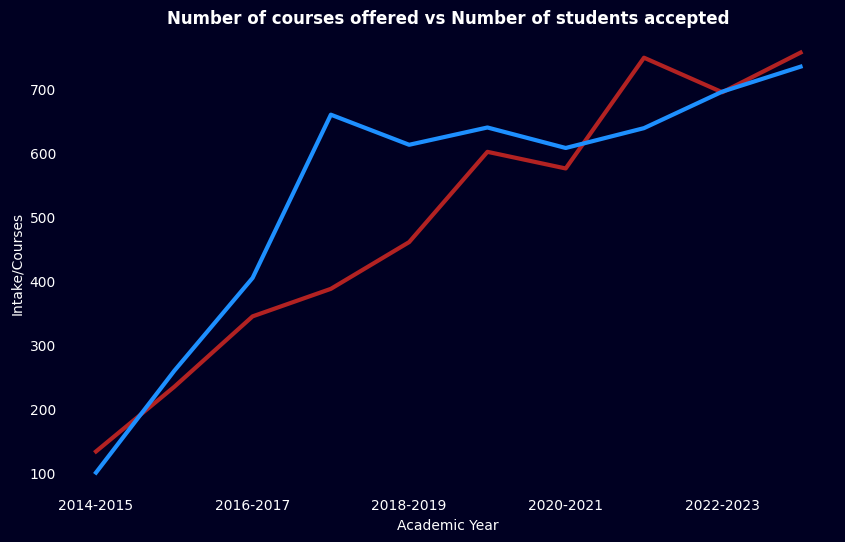

In [81]:
plt.figure(figsize=(10, 6))
ax2 = df2[df2["program"] == "UG"].groupby(["batch"])["batch"].count().plot(kind='line', linewidth=3, fontsize=10, color="firebrick", logy=False)
ax = df[(df["acad_year"] != "2024-2025") & (df["is_ism"] == False)].groupby(["acad_year"])["code"].count().plot(kind='line', linewidth=3, fontsize=10, color="dodgerblue", logy=False)
plt.title('Number of courses offered vs Number of students accepted', weight="bold", fontsize=12)

import matplotlib.ticker as ticker
# ax.plot(np.array(ax.get_xlim()), np.array(ax.get_ylim()), '--', color='lightcoral', linewidth=1)
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Academic Year', fontsize=10)
plt.ylabel('Intake/Courses', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

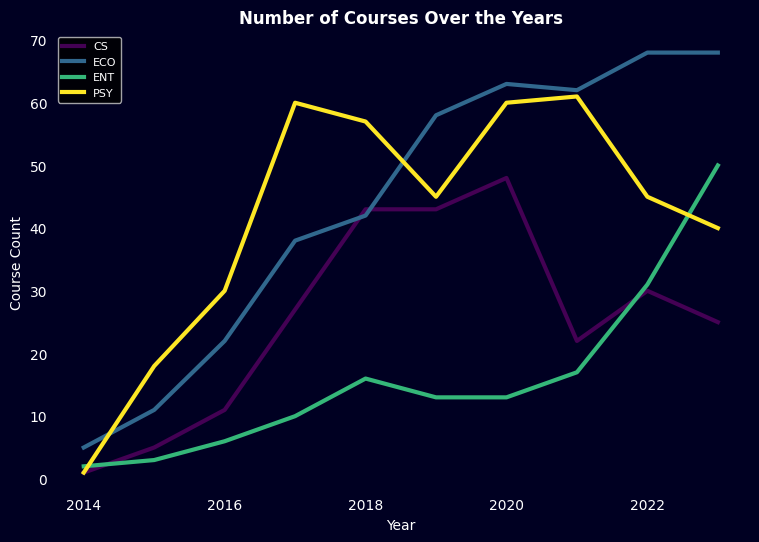

In [82]:
category_counts = df[(df["year"] != 2024) & (df["is_ism"] == False)].groupby(['year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "ENT", "CS"]))]

pivot_df = category_counts.pivot(index='year', columns='department', values='count').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Number of Courses Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Course Count', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=8, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

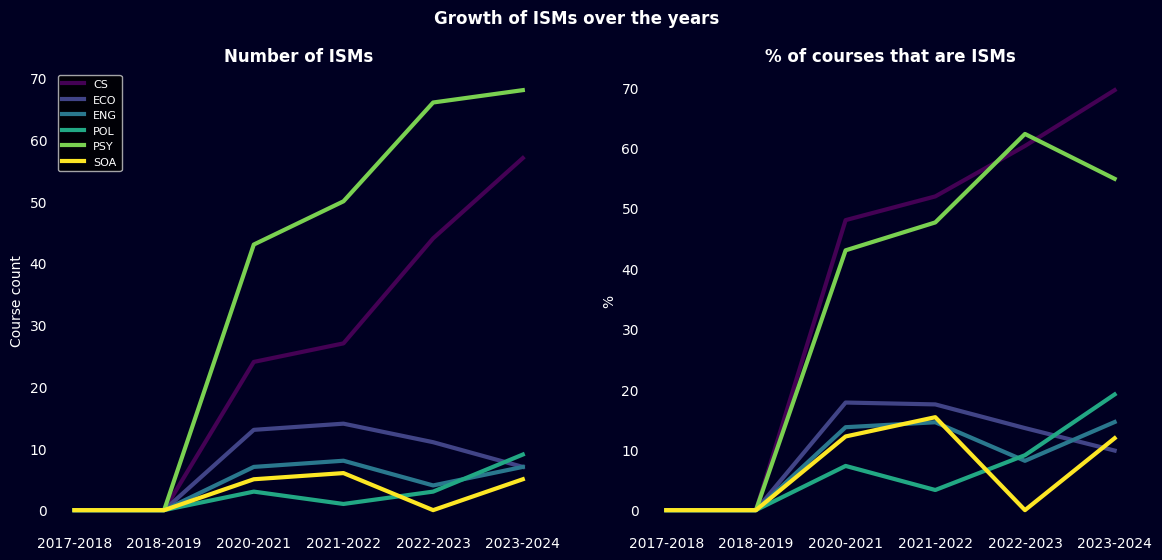

In [83]:
# Number of ISMs
category_counts = df[(df["acad_year"] != "2024-25") & (df["is_ism"] == True)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS", "POL", "ENG", "SOA"]))]

pivot_df1 = category_counts.pivot(index='acad_year', columns='department', values='count').fillna(0)
pivot_df1 = pd.concat([pd.DataFrame(0, index=["2017-2018", "2018-2019"], columns=pivot_df1.columns), pivot_df1])

# % of ISMSs
category_counts = df[(df["acad_year"] != "2024-2025") & (df["is_ism"] == True)].groupby(['acad_year', 'department']).size().reset_index(name='count')
yearly_totals = df[(df["acad_year"] != "2024-2025")].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS", "POL", "ENG", "SOA"]))]

category_counts = yearly_totals.merge(category_counts, on=['acad_year', 'department'], suffixes=('_total', ''))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df2 = category_counts.pivot(index='acad_year', columns='department', values='percentage').fillna(0)
pivot_df2 = pd.concat([pd.DataFrame(0, index=["2017-2018", "2018-2019"], columns=pivot_df2.columns), pivot_df2])

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Growth of ISMs over the years", weight="bold", x=0.5, y=0.98, fontsize=12)

pivot_df1.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df2.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1], legend=False)

axes[0].set_ylabel("Course count", fontsize=10)
axes[1].set_ylabel("%", fontsize=10)
axes[0].legend(fontsize=8, loc="upper left")
axes[0].set_title("Number of ISMs", weight="bold")
axes[1].set_title("% of courses that are ISMs", weight="bold")

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

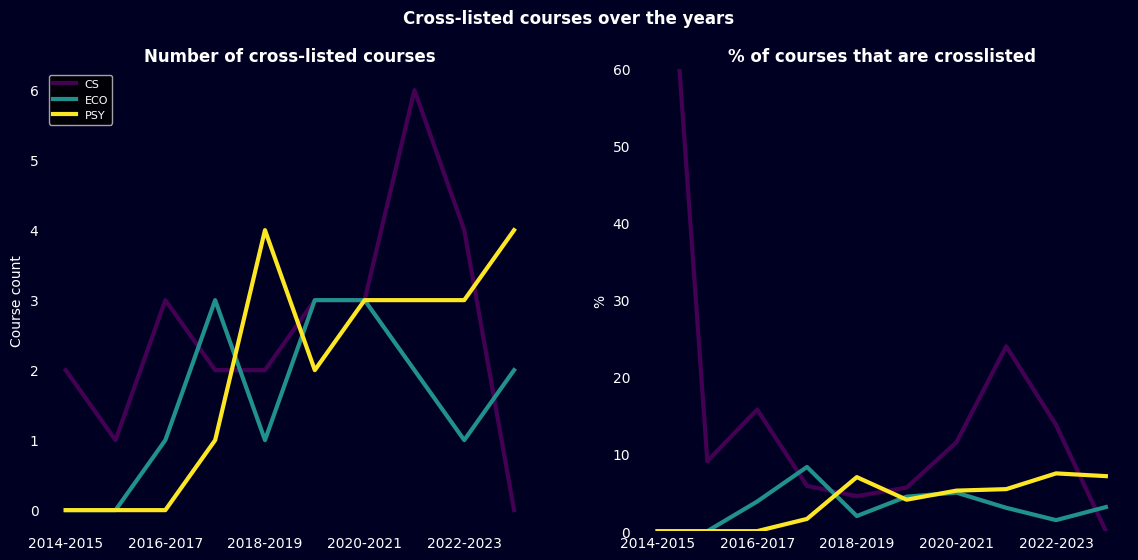

In [84]:
# Number of ISMs
category_counts = df[(df["acad_year"] != "2024-2025") & (df["is_crosslist"] == True) & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS"]))]

pivot_df1 = category_counts.pivot(index='acad_year', columns='department', values='count').fillna(0)

# % of ISMSs
category_counts = df[(df["acad_year"] != "2024-2025") & (df["is_crosslist"] == True) & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
yearly_totals = df[(df["acad_year"] != "2024-2025") & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS"]))]

category_counts = yearly_totals.merge(category_counts, on=['acad_year', 'department'], suffixes=('_total', ''))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df2 = category_counts.pivot(index='acad_year', columns='department', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Cross-listed courses over the years", weight="bold", x=0.5, y=0.98, fontsize=12)

pivot_df1.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df2.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1], legend=False)

axes[0].set_ylabel("Course count", fontsize=10)
axes[1].set_ylabel("%", fontsize=10)
axes[0].legend(fontsize=8, loc="upper left")
axes[0].set_title("Number of cross-listed courses", weight="bold")
axes[1].set_title("% of courses that are crosslisted", weight="bold")
axes[1].set_ylim(0, 60)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

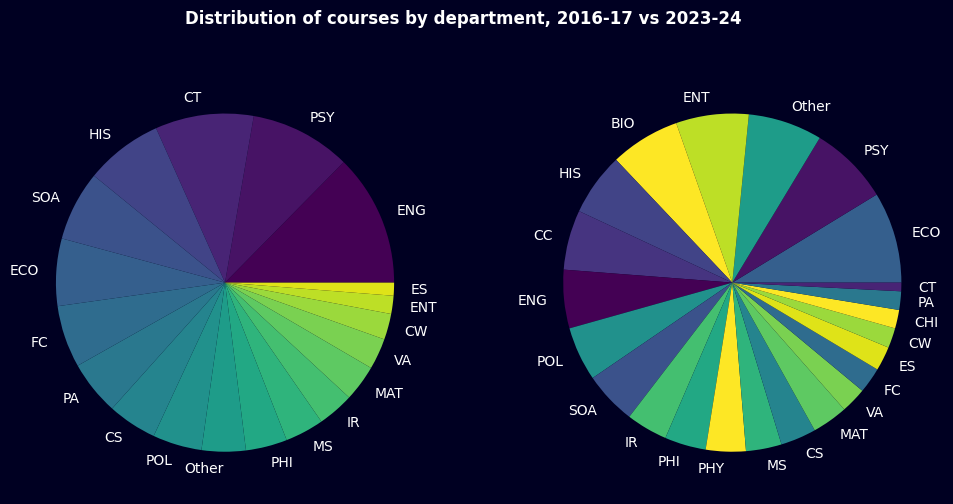

In [85]:
ug17 = df[(df["acad_year"] == "2016-2017") & (df["is_ism"] == False)]
ug24 = df[(df["acad_year"] == "2023-2024") & (df["is_ism"] == False)]

majors = ['PSY', 'ECO', 'CS', 'POL', 'FC', 'CT', 'BIO', 'SOA', 'ENG', 'IR', "MS", "VA", "PA", "ENT", 'CW', 'PHY', 'MAT', 'PHI', 'HIS', 'ES', 'CHI']

ug17["department"] = ug17["department"].apply(lambda x: x if x in majors else "CC" if x in ["CVA", "CLA", "CPA"] else "Other")
ug24["department"] = ug24["department"].apply(lambda x: x if x in majors else "CC" if x in ["CVA", "CLA", "CPA"] else "Other")
ug17values = ug17["department"].value_counts()
ug24values = ug24["department"].value_counts()

majorcolors = {label: color  for label, color in zip(['ENG', 'PSY', 'CT', 'CC', 'HIS', 'SOA', 'ECO', 'FC', 'PA', 'CS', 'POL', 'Other', 'PHI', 'MS', 'IR', 'MAT', 'VA', 'CW', 'ENT', 'ES', 'BIO', 'PHY', 'CHM', 'CHI'], (plt.get_cmap('viridis')(i / 20) for i in range(len(majors)+3)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of courses by department, 2016-17 vs 2023-24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["department"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["department"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()